In [1]:
import pandas as pd

In [3]:
netflix = pd.read_csv(r'C:\Users\Admin\Downloads\netflix_titles - netflix_titles.csv')

In [5]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
null_values = netflix.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [33]:
netflix.fillna({
    "director": "Unknown",
    "cast": "Unknown",
    "country": "Unknown",
    "rating": "Unknown"
}, inplace=True)

In [39]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'],errors='coerce')

In [43]:
print(netflix.dtypes)

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
duration_minutes           float64
dtype: object


In [49]:
netflix['genres'] = netflix['listed_in'].str.split(', ')

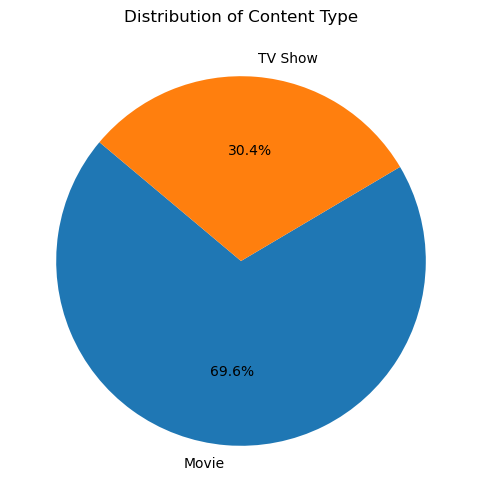

In [61]:
import matplotlib.pyplot as plt

type_counts = netflix['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type')
plt.show()


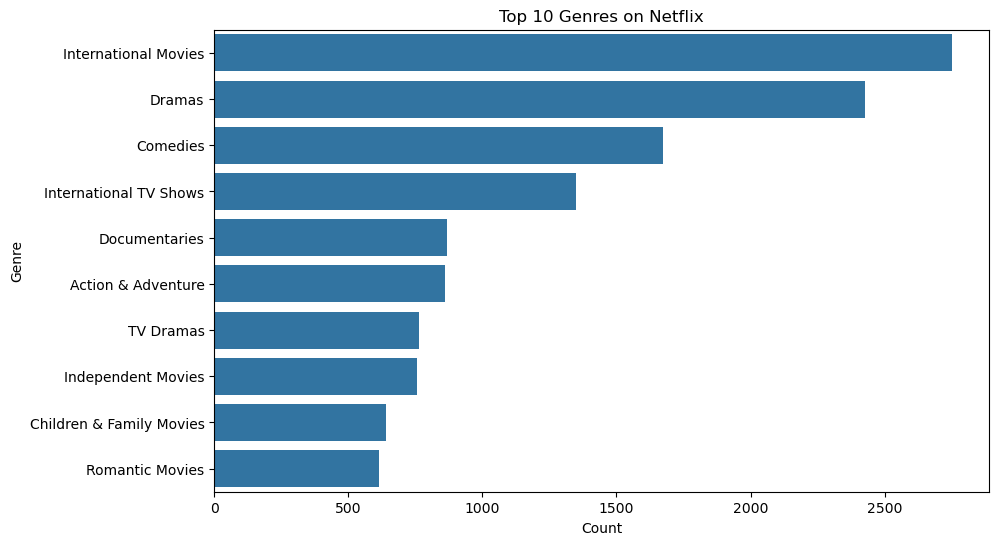

In [69]:
from collections import Counter

all_genres = netflix['genres'].explode()
genre_counts = Counter(all_genres)

plt.figure(figsize=(10, 6))
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
sns.barplot(data=genre_df, x='Count', y='Genre')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

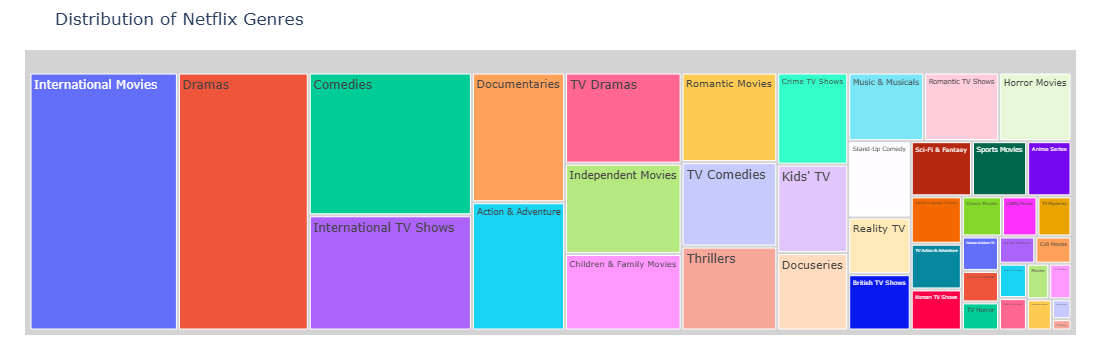

In [75]:
import pandas as pd
from collections import Counter
import plotly.express as px

all_genres = netflix['genres'].explode()
genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

fig = px.treemap(genre_df, path=['Genre'], values='Count', title='Distribution of Netflix Genres')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

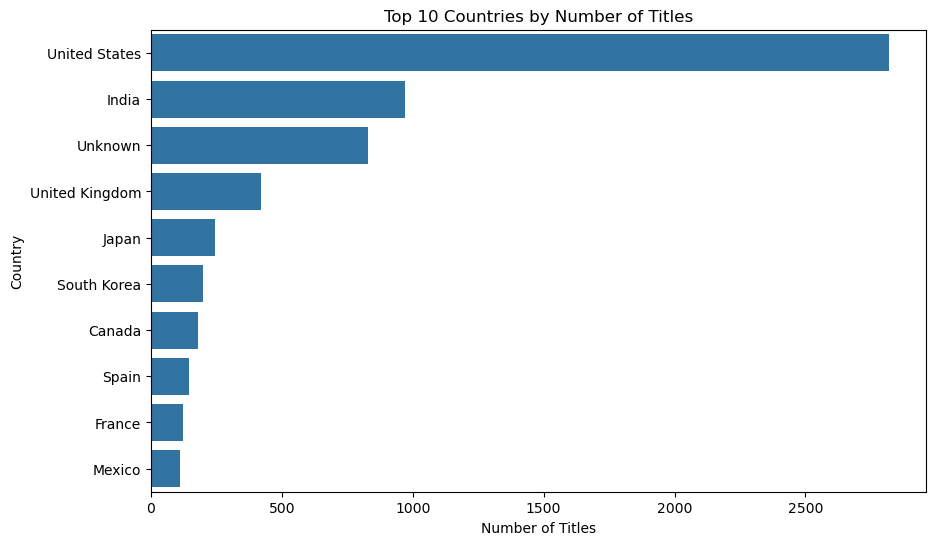

In [79]:
# Count the number of titles by country
country_counts = netflix['country'].value_counts().head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


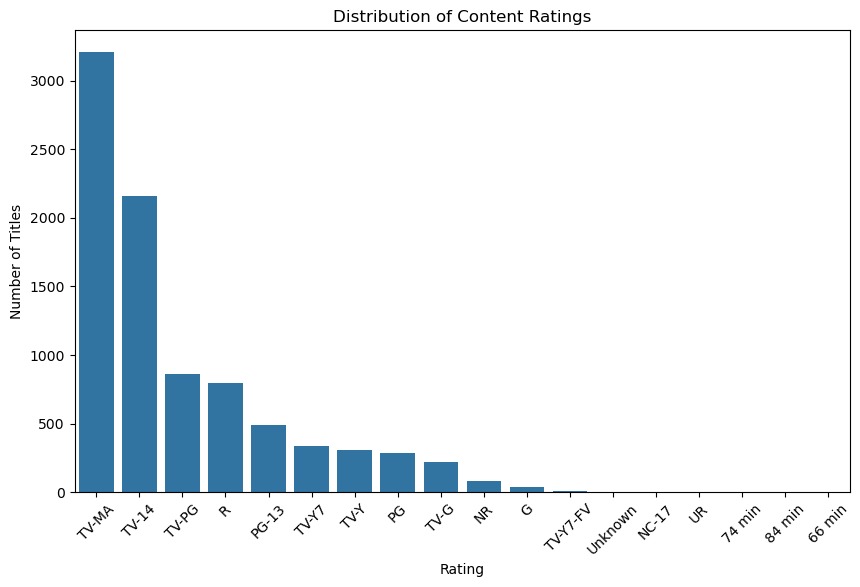

In [81]:
# Count the number of titles by rating
rating_counts = netflix['rating'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


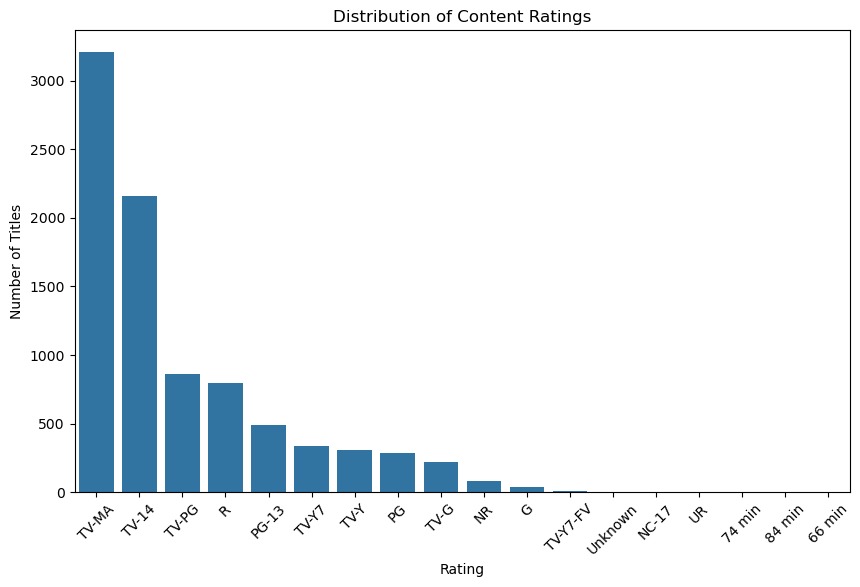

In [85]:
# Count the number of titles by rating
rating_counts = netflix['rating'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


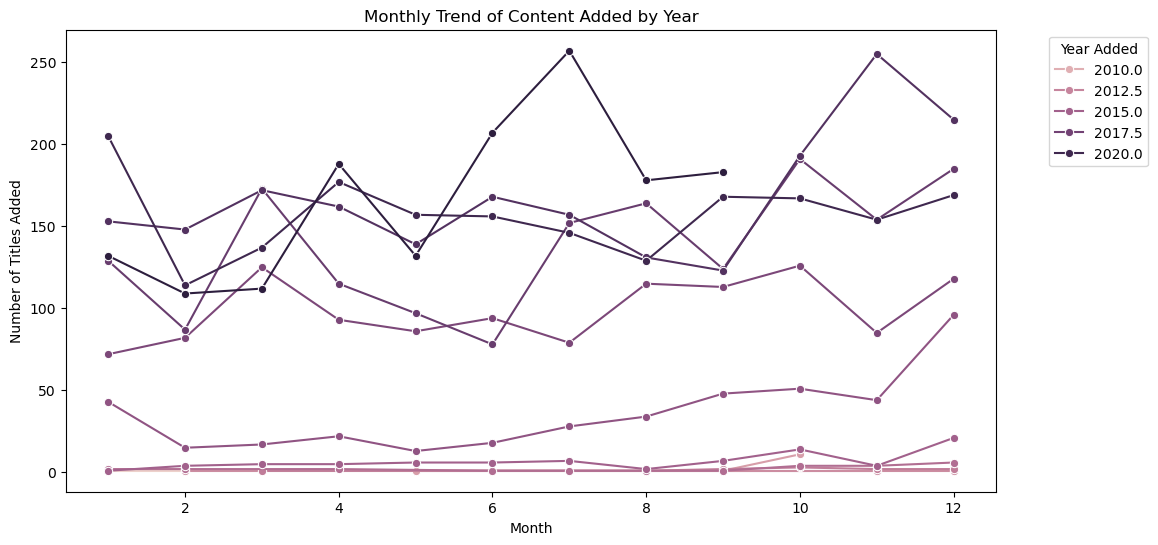

In [89]:
# Extract month and year for more granular time analysis
netflix['month_added'] = netflix['date_added'].dt.month
netflix['year_added'] = netflix['date_added'].dt.year

# Group by month and year for monthly trends
monthly_trend = netflix.groupby(['year_added', 'month_added']).size().reset_index(name='Count')

# Plot line chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month_added', y='Count', hue='year_added', marker='o')
plt.title('Monthly Trend of Content Added by Year')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.legend(title='Year Added', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


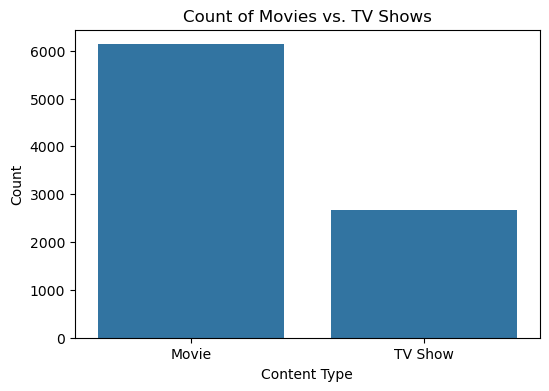

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the types (Movies vs. TV Shows)
type_counts = netflix['type'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Count of Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


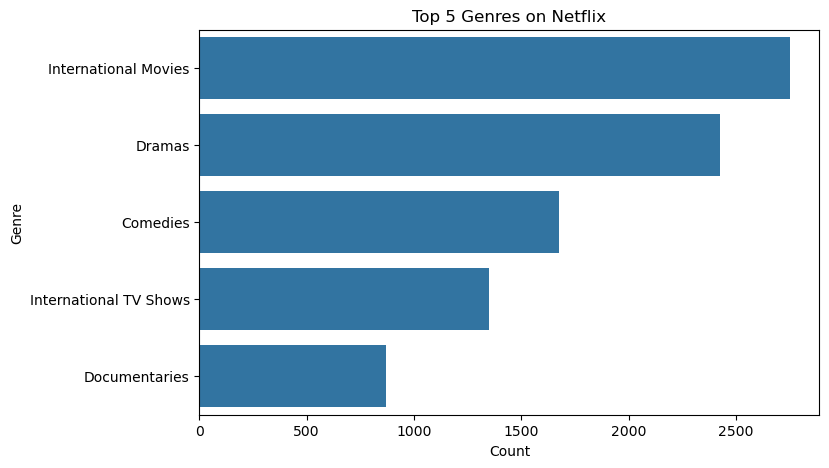

In [95]:
from collections import Counter

# Flatten the list of genres and count occurrences
all_genres = netflix['genres'].explode()
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(5)

# Convert to DataFrame for easier plotting
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=genre_df, x='Count', y='Genre')
plt.title('Top 5 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


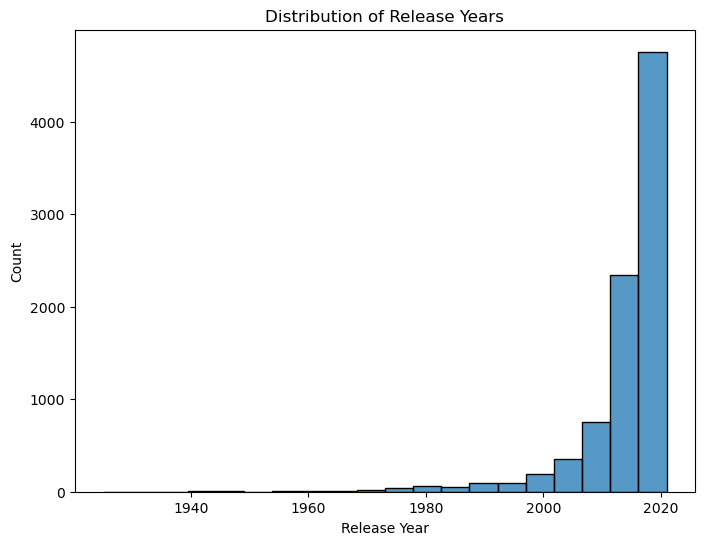

In [97]:
# Plot histogram of release years
plt.figure(figsize=(8, 6))
sns.histplot(netflix['release_year'], bins=20, kde=False)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


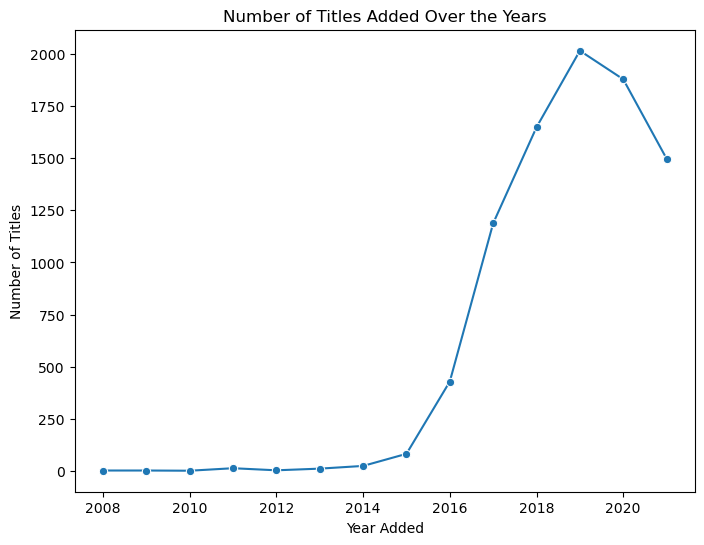

In [99]:
# Extract the year from 'date_added' for trend analysis
netflix['year_added'] = netflix['date_added'].dt.year

# Count titles by year
year_counts = netflix['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()
